# Computer Vision: Basic CNNs

### Reza Mousavi, University of Virginia, mousavi@virginia.edu 

In [1]:
!pip install keras

In [1]:
# IPython display functions
import IPython
from IPython.display import display, HTML, SVG, Image

# General Plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-paper')
plt.rcParams['figure.figsize'] = [10, 6] ## plot size
plt.rcParams['axes.linewidth'] = 2.0 #set the value globally

## notebook style and settings
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; } </style>"))
display(HTML("<style>.MathJax {font-size: 100%;}</style>"))

# For changing background color
def set_background(color):
    script = ( "var cell = this.closest('.code_cell');" "var editor = cell.querySelector('.input_area');" "editor.style.background='{}';" "this.parentNode.removeChild(this)" ).format(color)
    display(HTML('<img src onerror="{}">'.format(script)))

# Library Imports

In [2]:
import os
import sys
import numpy as np
import pandas as pd

# Keras library for deep learning
# https://keras.io/
import keras
from keras.datasets import mnist # MNIST Data set
from keras.models import Sequential # Model building
from keras.layers import * # Model layers

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Data Loading

In this notebook, we will use a well-known data set MNIST, which contains hand-written digits. Each image in the data has 784 pixels (28x28) and each value in each pixel ranges between 0-255 (single grayscale). For more information about MNIST, please visit: https://en.wikipedia.org/wiki/MNIST_database 

In [4]:
# Load data set into training and testing set
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Save copies of the data. We will use this later on when we develop our deep learning architecture
rawTrainingImages, rawTestingImages = np.array(trainImages), np.array(testImages)

rawtestLabels = testLabels

Before moving forward, we take a look at the first image in the trainImages:

In [5]:
trainImages[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As you can see the image is a list of lists (i.e. a matrix) of numbers. We can use pyplot's imshow() to display this image:  

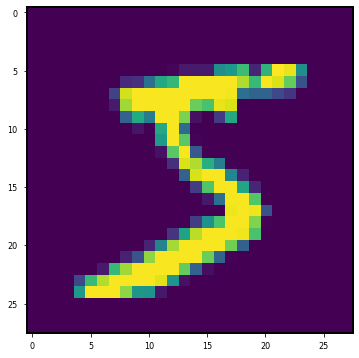

In [6]:
plt.imshow(trainImages[0])

This image in the training data should also have a label. Let's see what's the label for this image:

In [8]:
trainLabels[0]

5

# 2. Deep Learning for Image Recognition
## 2.1 Feed-forward Neural Networks
Before diving into the more complex deep learning architectures, we will first try to recognize images with the most simple form of neural networks i.e feed-forward neural networks

<img src="https://ml4a.github.io/images/figures/mnist_2layers.png">
<hr>
<center><b>Feed-forward Neural Network for MNIST Digit Recognition</b></center>

To be able to use the feed-forward neural network to process images as data, we need to flatten the images first. This will convert each 28x28 image into a single vector of 784 values. We use the function image.ravel() to do this. Essentially, ravel() flattens a 2 dimensional list into a single list: 

In [9]:
trainImages = np.array([image.ravel().astype('float32') for image in list(trainImages)])
testImages = np.array([image.ravel().astype('float32') for image in list(testImages)])

Given that the values inside pixels range between 0 and 255, we divide all of them by 255 to make them range between 0 and 1. This is called normalization. Neural Nets work better with normalized data:

In [10]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

Now, we convert class labels to one-hot encoded representations:

In [11]:
trainLabels = keras.utils.to_categorical(trainLabels, 10)
testLabels = keras.utils.to_categorical(testLabels, 10)

Let's take a look at the transformed label of our first image:

In [12]:
trainLabels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

So far, we pre-processed our images such that they can be fed to a feed-forward neural network. Now, we use the following function to design our feed-forward neural net:

In [13]:
def createFeedforwardNeuralNetwork(trainImages, numLayers, numUnits, dropoutValue, numClasses):
    # Create model object
    model = Sequential()
    
    # Add the first layer with dropout
    model.add(Dense(numUnits, input_shape = trainImages.shape[1:]))
    model.add(Dropout(dropoutValue))
    
    # Add more layers if numLayers > 1
    while numLayers > 1:
        model.add(Dense(numUnits))
        model.add(Dropout(dropoutValue))
        numLayers = numLayers - 1
    
    # Add prediction layer. Softmax activation function is used with the final prediction layer
    model.add(Dense(numClasses, activation = 'softmax'))
    
    # Compile model. You can skip this line.
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    # Return model
    return model

Before training the neural net, we need to specify the parameter values. Feel free to change them if you wish:

In [16]:
#####################################################################################################################################################
# Things you can change                                                                                                                             
#####################################################################################################################################################
numLayers = 1 # Number of layers in the neural network
numUnits = 128 # Number of units in each layer
dropoutValue = 0.5 # Dropout probability
numClasses = 10 # Don't change this value for MNIST since we have 10 classes i.e we are trying to recognize a digit among 10 digits. But for any other data set, this should be changed
epochsToTrain = 10 # Epochs for training
batchSize = 32 # How many images should a single batch contain
#####################################################################################################################################################

Now, let's go ahead and take a look at the network:

In [15]:
model = createFeedforwardNeuralNetwork(trainImages, numLayers, numUnits, dropoutValue, numClasses)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


We can now go ahead and train the model using our data:

In [73]:
bestTestAccuracy = 0
for epoch in range(epochsToTrain):
    model.fit(trainImages, trainLabels, batch_size=batchSize, epochs=1, verbose=1)
    testAccuracy = model.evaluate(testImages, testLabels, verbose=0)[1]
    if testAccuracy > bestTestAccuracy:
        bestTestAccuracy = testAccuracy
print("\nBest test accuracy using feedforward neural networks is: %.2f" % (bestTestAccuracy * 100))

1875/1875 [==============================] - 1s 639us/step - loss: 0.3120 - accuracy: 0.9127

Best test accuracy using feedforward neural networks is: 92.54


## 2.2 Convolutional Neural Networks

Now, let's try to solve the same problem using a CNN. Basically, we add convolutional and pooling layer(s) before the feed-forward layer(s):

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width="800px">
<hr>
<center><b>Convolutional Neural Networks for MNIST Digit Recognition</b></center>

We use the following function to design our CNN:

In [17]:
def createConvolutionalNeuralNetwork(trainImages, numLayers, numFilters, kernelSize, maxPooling, dropoutValue, numClasses):
    # Create model object
    model = Sequential()
    
    # Add the first layer with dropout
    model.add(Conv2D(numFilters, kernel_size=(kernelSize, kernelSize),
                     activation='relu',
                     input_shape=trainImages.shape[1:]))
    model.add(MaxPooling2D(pool_size=(maxPooling, maxPooling)))
    model.add(Dropout(dropoutValue))
    
    while numLayers > 1:
        model.add(Conv2D(numFilters, kernel_size=(kernelSize, kernelSize),
                     activation='relu'))
        model.add(MaxPooling2D(pool_size=(maxPooling, maxPooling)))
        model.add(Dropout(dropoutValue))
        
        numLayers = numLayers - 1
        
    # Convolutional layers are done, adding the remaining stuff
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropoutValue))
    model.add(Dense(numClasses, activation='softmax'))

    # Compile model. You can skip this line.
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    # Return model
    return model

In [18]:
set_background('#fce53a')

#####################################################################################################################################################
# Things you can change                                                                                                                             
#####################################################################################################################################################
numLayers = 1 # Number of layers in the neural network
numFilters = 32 # Number of units in each layer
kernelSize = 5 # filter size of a single filter
dropoutValue = 0.2 # Dropout probability
maxPooling = 2 # Max pooling
numClasses = 10 # Don't change this value for MNIST since we have 10 classes i.e we are trying to recognize a digit among 10 digits. But for any other data set, this should be changed
epochsToTrain = 10 # Epochs for training
batchSize = 32 # How many images should a single batch contain
#####################################################################################################################################################

Recall that we saved the original data in rawTrainingImages and rawTestingImages. These image data are in 28 by 28 pixels. To be able to feed these images to the CNN, we need to add the channel (color) information to the images. So, we convert each 28 by 28 matrix, to a 28 by 28 by c matrix, where c is the number of channels. Given that all these images are in grayscale channel, we only have one channel. Hence, n = 1. Therefore, we need to convert the 28 by 28 matrices to 28 by 28 by 1 matrices: 

In [19]:
# Before adding the channel info:
rawTrainingImages[0].shape

(28, 28)

In [20]:
rawTrainingImages = rawTrainingImages.reshape(len(rawTrainingImages), 28, 28, 1)
rawTestingImages = rawTestingImages.reshape(len(rawTestingImages), 28, 28, 1)

In [21]:
# After adding the channel info:
rawTrainingImages[0].shape

(28, 28, 1)

Now, we can go ahead and create the model: 

In [23]:
model = createConvolutionalNeuralNetwork(rawTrainingImages, numLayers, numFilters, kernelSize, maxPooling, dropoutValue, numClasses)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

And finally, we can go ahead and train it:

In [24]:
bestTestAccuracy = 0
for epoch in range(epochsToTrain):
    model.fit(rawTrainingImages, trainLabels, batch_size=batchSize, epochs=1, verbose=1)
    testAccuracy = model.evaluate(rawTestingImages, testLabels, verbose=0)[1]
    if testAccuracy > bestTestAccuracy:
        bestTestAccuracy = testAccuracy
print("\nBest test accuracy using Convolutional Neural Network is: %.2f" % (bestTestAccuracy * 100))

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0764 - accuracy: 0.9789

Best test accuracy using Convolutional Neural Network is: 98.47


Now, we can use our CNN to make predictions:

In [27]:
predicted_classes = model.predict_classes(rawTestingImages)

Another way to obtain the predictions:

In [28]:
predicted_classes = np.argmax(model.predict(rawTestingImages), axis=-1)

Let's go ahead and check the prediction for the very first image in the test set:

In [29]:
print("The predicted number is {}, and the actual number was {}.".format(predicted_classes[0],rawtestLabels[0]))

The predicted number is 7, and the actual number was 7.


Now, let's see what the original image was:

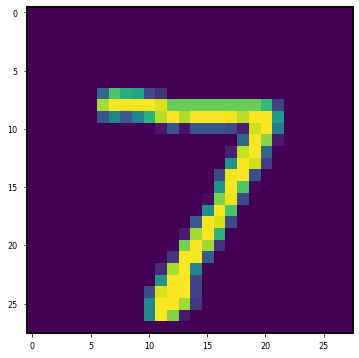

In [31]:
plt.imshow(rawTestingImages[0])